In [2]:
import pandas as pd

data = pd.read_csv("2017_world_happiness_resort.csv")
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 12 columns):
Country                          154 non-null object
Happiness.Rank                   154 non-null int64
Happiness.Score                  154 non-null float64
Whisker.high                     154 non-null float64
Whisker.low                      154 non-null float64
Economy..GDP.per.Capita.         154 non-null float64
Family                           154 non-null float64
Health..Life.Expectancy.         154 non-null float64
Freedom                          154 non-null float64
Generosity                       154 non-null float64
Trust..Government.Corruption.    154 non-null float64
Dystopia.Residual                154 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.5+ KB


In [4]:
data.describe()


,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,77.500000,5.371299,5.469127,5.273470,0.991112,1.196618,0.554799,0.409682,0.246663,0.123552,1.848837
std,44.600075,1.114210,1.102394,1.127151,0.414542,0.271590,0.233891,0.150070,0.135192,0.101849,0.501354
min,1.000000,2.905000,3.074690,2.735310,0.022643,0.396103,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.250000,4.519250,4.616703,4.377365,0.679481,1.049448,0.380798,0.307313,0.153590,0.057931,1.587952
50%,77.500000,5.286000,5.380905,5.193687,1.066948,1.254751,0.609627,0.438880,0.231521,0.089914,1.829808
75%,115.750000,6.103250,6.195921,6.012285,1.319453,1.415360,0.724903,0.517596,0.324529,0.153411,2.147727
max,154.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


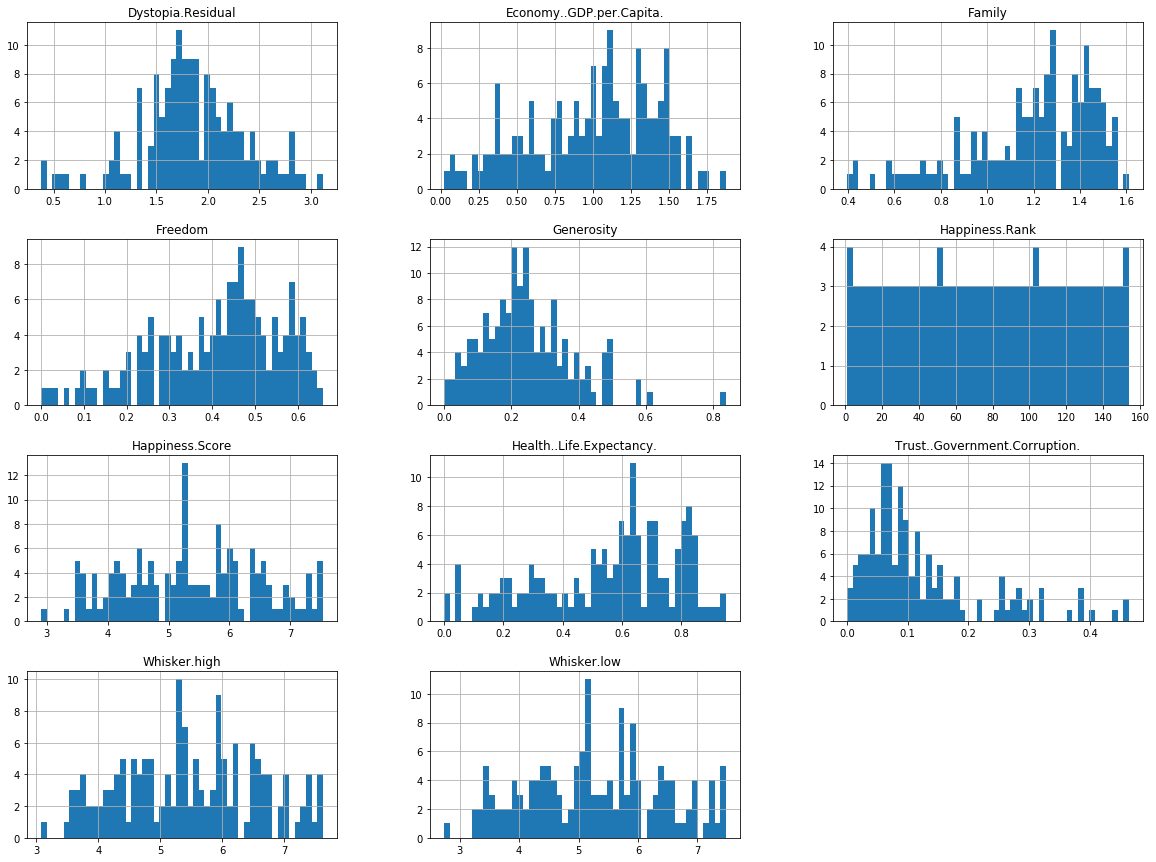

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [6]:
import hashlib
import numpy as np
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]



In [7]:
data_with_id = data.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")

In [8]:
print("length of train_set: ", len(train_set))
print("length of test_set: ", len(test_set))

length of train_set:  124
length of test_set:  30


Preparing the data

In [9]:
data = train_set.drop(["Happiness.Score","Happiness.Rank","Whisker.high","Whisker.low"], axis = 1) # drop labels for training set
data_labels = train_set["Happiness.Score"].copy()

In [10]:
#using Imputer to change 0 (assumed as null input data) to mean instead
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="mean", missing_values = 0)

In [11]:
data_num = data.drop('Country', axis=1)
data_num.head()

,index,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,0,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,1,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,2,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,3,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
6,6,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264


In [12]:
imputer.fit(data_num)

SimpleImputer(copy=True, fill_value=None, missing_values=0, strategy='mean',
       verbose=0)

In [13]:
imputer.statistics_

array([76.54471545,  0.98418839,  1.1988766 ,  0.56192564,  0.41596446,
        0.24831369,  0.12197952,  1.86701326])

In [14]:
data_num.mean().values

array([75.92741935,  0.98418839,  1.1988766 ,  0.55739398,  0.4126099 ,
        0.24631116,  0.12197952,  1.86701326])

In [15]:
X = imputer.transform(data_num)

In [16]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index = list(data.index.values))

In [17]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean", missing_values = 0))
    ])

data_prepared = num_pipeline.fit_transform(data_num)

In [18]:
data_prepared

array([[7.65447154e+01, 1.61646318e+00, 1.53352356e+00, 7.96666503e-01,
        6.35422587e-01, 3.62012237e-01, 3.15963835e-01, 2.27702665e+00],
       [1.00000000e+00, 1.48238301e+00, 1.55112159e+00, 7.92565525e-01,
        6.26006722e-01, 3.55280489e-01, 4.00770068e-01, 2.31370735e+00],
       [2.00000000e+00, 1.48063302e+00, 1.61057401e+00, 8.33552122e-01,
        6.27162635e-01, 4.75540221e-01, 1.53526559e-01, 2.32271528e+00],
       [3.00000000e+00, 1.56497955e+00, 1.51691175e+00, 8.58131289e-01,
        6.20070577e-01, 2.90549278e-01, 3.67007285e-01, 2.27671623e+00],
       [6.00000000e+00, 1.47920442e+00, 1.48134899e+00, 8.34557652e-01,
        6.11100912e-01, 4.35539722e-01, 2.87371516e-01, 2.18726444e+00],
       [7.00000000e+00, 1.40570605e+00, 1.54819512e+00, 8.16759706e-01,
        6.14062130e-01, 5.00005126e-01, 3.82816702e-01, 2.04645634e+00],
       [8.00000000e+00, 1.49438727e+00, 1.47816217e+00, 8.30875158e-01,
        6.12924099e-01, 3.85399252e-01, 3.84398729e-01, 2.

Select and train a model

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.06166141759089634

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)

In [22]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [0.19675792 0.01251162 0.05107958 0.02937211 0.14177183]
Mean: 0.08629861156628457
Standard deviation: 0.07099868225607334


Try with Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [24]:
scores = cross_val_score(tree_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [25]:
display_scores(tree_rmse_scores)

Scores: [0.78425365 0.26408308 1.67496978 0.31488038 0.55160554]
Mean: 0.7179584874772927
Standard deviation: 0.513110869074194


Try with Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(data_prepared, data_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [27]:
forest_scores = cross_val_score(forest_reg, data_prepared, data_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.76104759 0.24572372 0.37797139 0.32058374 0.55628931]
Mean: 0.45232314799751483
Standard deviation: 0.18530327868769114


    Fine-Tuning: GridSearchCV using Linear Regression model

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 8 (2×2x2) combinations of hyperparameters
   {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
]

grid_search = GridSearchCV(lin_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_prepared, data_labels)

c:\users\nipha\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [29]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.11147593599969087 {'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.11147593599969154 {'copy_X': True, 'fit_intercept': True, 'normalize': False}
0.07043276277988837 {'copy_X': True, 'fit_intercept': False, 'normalize': True}
0.07043276277988837 {'copy_X': True, 'fit_intercept': False, 'normalize': False}
0.11147593599969087 {'copy_X': False, 'fit_intercept': True, 'normalize': True}
0.11147593599969154 {'copy_X': False, 'fit_intercept': True, 'normalize': False}
0.07043276277988837 {'copy_X': False, 'fit_intercept': False, 'normalize': True}
0.07043276277988837 {'copy_X': False, 'fit_intercept': False, 'normalize': False}


In [30]:
grid_search.best_estimator_

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=True)

    Testing with the test set

In [31]:
final_model = grid_search.best_estimator_

X_test = test_set.drop(["Happiness.Score","Happiness.Rank","Whisker.high","Whisker.low"], axis=1)
y_test = test_set["Happiness.Score"].copy()

X_test_num = X_test.drop('Country', axis=1)
X_test_prepared = num_pipeline.fit_transform(X_test_num)

final_predictions = final_model.predict(X_test_prepared)


final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [32]:
final_rmse

0.029612678163630318